In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_dataset=r"C:\Users\Arin\Downloads\mnist\mnist-jpg\train"

test_dataset=r"C:\Users\Arin\Downloads\mnist\mnist-jpg\test"

datagen=ImageDataGenerator(rescale=1./255) 


traingen=datagen.flow_from_directory(
    train_dataset,
    batch_size=128,
    target_size=(28,28),
    color_mode="grayscale",
    class_mode="categorical"
)

testgen=datagen.flow_from_directory(
    test_dataset,
    batch_size=128,
    target_size=(28,28),
    color_mode="grayscale",
    class_mode="categorical"
)

Found 60000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.optimizers import SGD

In [ ]:
ff_model=Sequential([
    Flatten(input_shape=(28,28,1)),
    Dense(128,activation="relu"),
    Dense(64,activation="relu"),
    Dense(10,activation="softmax")
])

D:\Anaconda\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
ff_model.compile(optimizer=SGD(),
                 loss="categorical_crossentropy",
                metrics=["accuracy"])

In [ ]:
history_ff=ff_model.fit(
    traingen,
    validation_data=testgen,
    epochs=5
)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 501s 1s/step - accuracy: 0.9790 - loss: 0.0683 - val_accuracy: 0.9689 - val_loss: 0.0957
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 465s 991ms/step - accuracy: 0.9833 - loss: 0.0525 - val_accuracy: 0.9758 - val_loss: 0.0772
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 479s 1s/step - accuracy: 0.9873 - loss: 0.0422 - val_accuracy: 0.9707 - val_loss: 0.0925
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 536s 1s/step - accuracy: 0.9894 - loss: 0.0353 - val_accuracy: 0.9794 - val_loss: 0.0699
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 539s 1s/step - accuracy: 0.9910 - loss: 0.0293 - val_accuracy: 0.9765 - val_loss: 0.0779


In [ ]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.0 MB 1.3 MB/s eta 0:00:09
   - -------------------------------------- 0.5/11.0 MB 5.0 MB/s eta 0:00:03
   -- ------------------------------------- 0.8/11.0 MB 5.7 MB/s eta 0:00:02
   --- ------------------------------------ 1.0/11.0 MB 5.2 MB/s eta 0:00:02
   --- ------------------------------------ 1.1/11.0 MB 4.6 MB/s eta 0:00:03
   ---- ----------------------------------- 1.2/11.0 MB 4.1 MB/s eta 0:00:03
   ---- ----------------------------------- 1.3/11.0 MB 3.9 MB/s eta 0:00:03
   ----- ---------------------------------- 1.4/11.0 MB 3.8 MB/s eta 0:00:03
   ----- ---------------------------------- 1.5/11.0 MB 3.7 MB/s eta 0:00:03
   ------ --------------------------------- 1.7/

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mlxtend 0.23.2 requires joblib>=0.13.2, which is not installed.
mlxtend 0.23.2 requires scikit-learn>=1.3.1, which is not installed.


<Axes: >

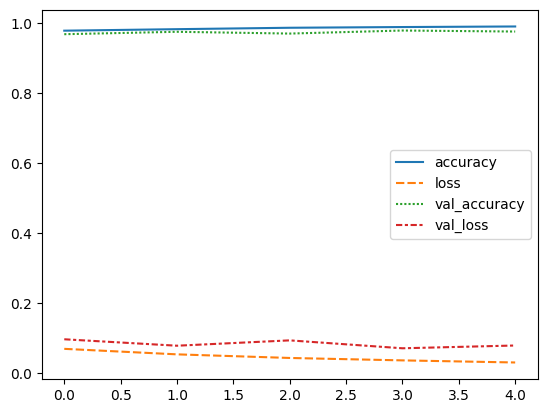

In [ ]:
import seaborn as sns
sns.lineplot(history_ff.history)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


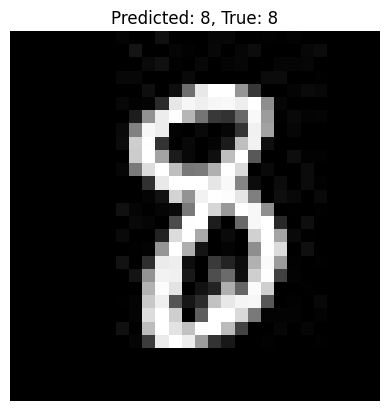

In [ ]:
# --- Predict a single image from the test generator ---
import numpy as np
import matplotlib.pyplot as plt

# Get one batch of test images and labels
x_batch, y_batch = next(testgen)

# Pick one image from the batch (e.g., index 15)
img = x_batch[15]
true_label = np.argmax(y_batch[15])

# Predict the label
pred = ff_model.predict(np.expand_dims(img, axis=0))
predicted_label = np.argmax(pred, axis=1)[0]

# Show the image and prediction
plt.imshow(img.squeeze(), cmap='gray')
plt.title(f"Predicted: {predicted_label}, True: {true_label}")
plt.axis('off')
plt.show()